# Importing Libraries

In [2]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.
C:\Users\harik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\harik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\harik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\harik\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

# Training and Testing Dataset

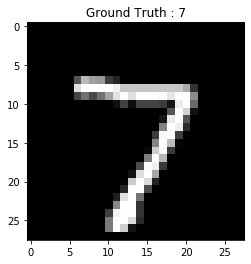

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# display the first image in the training data
plt.imshow(test_images[0, :, :], cmap='gray')
plt.title('Ground Truth : {}'.format(test_labels[0]))
plt.show()

# Converting shape

In [4]:
# process the data
# 1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

# Performing Scaling and One-Hot Encoding

In [5]:

# convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
# scale data
train_data /= 255.0
test_data /= 255.0
# change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Adding Dense Layer and Evaluating Loss and Accuracy and Predicting Image

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 206us/step - loss: 0.2815 - accuracy: 0.9125 - val_loss: 0.1320 - val_accuracy: 0.9593
Epoch 2/5
60000/60000 [==============================] - 11s 187us/step - loss: 0.0917 - accuracy: 0.9711 - val_loss: 0.0790 - val_accuracy: 0.9749
Epoch 3/5
60000/60000 [==============================] - 11s 179us/step - loss: 0.0583 - accuracy: 0.9814 - val_loss: 0.0823 - val_accuracy: 0.9732
Epoch 4/5
60000/60000 [==============================] - 12s 205us/step - loss: 0.0389 - accuracy: 0.9875 - val_loss: 0.0788 - val_accuracy: 0.9774
Epoch 5/5
10000/10000 [==============================] - 2s 221us/step
Evaluation result on Test Data : Loss = 0.08124748722081931, accuracy = 0.9754999876022339
The prediction of the 0th in the test dataset is: 7


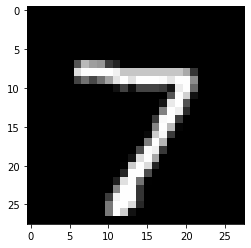

In [10]:
# creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=5, verbose=1,
                    validation_data=(test_data, test_labels_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
img_class = model.predict_classes(test_data[[0], :])
prediction = img_class[0]
classname = img_class[0]
print("The prediction of the 0th in the test dataset is:", classname)
plt.imshow(test_images[0,:,:],cmap='gray')
plt.show()